<a href="https://colab.research.google.com/github/Jules-4LL4RT/Internship/blob/main/Test_Concat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Archive:  gdrive/MyDrive/Stage4A/AllDays.zip
replace AllDays/newFridayAfternoonDDoSaa.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
/content/gdrive/MyDrive/Stage4A/AllDays/


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


133151865
|---  Bwd Packet Length Std <= 1495.68
|   |---  Average Packet Size <= 7.69
|   |   |---  Packet Length Std <= 2.29
|   |   |   |--- Total Length of Fwd Packets <= 21.00
|   |   |   |   |--- class: BENIGN
|   |   |   |--- Total Length of Fwd Packets >  21.00
|   |   |   |   |--- class: DDoS
|   |   |---  Packet Length Std >  2.29
|   |   |   |--- class: PortScan
|   |---  Average Packet Size >  7.69
|   |   |--- class: BENIGN
|---  Bwd Packet Length Std >  1495.68
|   |---  Fwd Packet Length Max <= 41.00
|   |   |--- class: DDoS
|   |---  Fwd Packet Length Max >  41.00
|   |   |--- class: DoS Hulk

Original num features: 76, selected num features: 5
0.	 Bwd Packet Length Std - 0.39116552653277004
1.	 Packet Length Std - 0.17943219607861663
2.	 Average Packet Size - 0.17641894129676938
3.	 Fwd Packet Length Max - 0.15047534045538982
4.	Total Length of Fwd Packets - 0.10250799563645405
5.	 Idle Min - 0.0
6.	 Bwd IAT Max - 0.0
7.	 Fwd IAT Max - 0.0
8.	 Fwd IAT Min - 0.0
9.	Bwd 

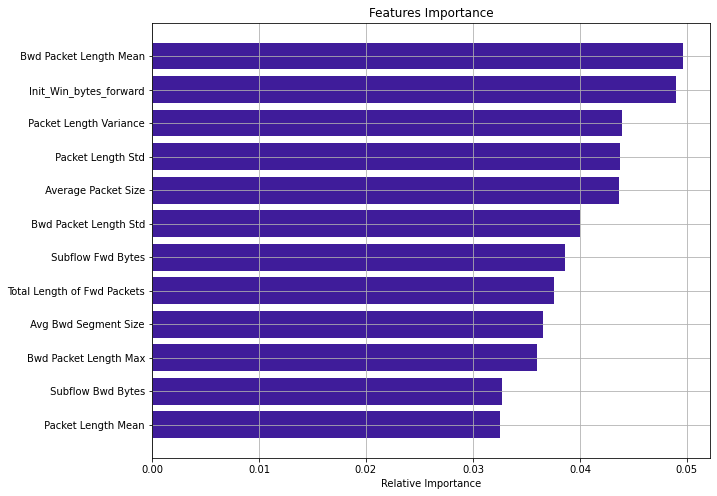

In [ ]:
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.utils import get_file
from time import time
from sklearn import preprocessing
from sklearn.datasets import make_classification
from numpy import mean
from numpy import std
from sklearn.tree import export_text
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from scipy.stats import zscore
from google.colab import drive
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_regression
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from numpy import arange
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

drive.mount('/content/gdrive')

!unzip gdrive/MyDrive/Stage4A/AllDays.zip

'''
try:
    path = get_file('/content/gdrive/MyDrive/Stage4A/AllDays/newFridayAfternoonDDoSaa.csv', origin=\
    '/content/gdrive/MyDrive/Stage4A/AllDays.zip',archive_format=None)
except:
   print('Something went wrong, please try again')
   raise
'''

try:
    path = get_file('/content/gdrive/MyDrive/Stage4A/AllDays/', origin=\
    '/content/gdrive/MyDrive/Stage4A/AllDays.zip',archive_format=None)
except:
   print('Something went wrong, please try again')
   raise

print(path)
dfbase = pd.read_csv(path + "newFridayAfternoonDDoSaa.csv", sep=',',error_bad_lines=True,engine='python')

dfFAD = pd.read_csv(path + "Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv", sep=',',error_bad_lines=True,engine='python') 
dfFAP = pd.read_csv(path + "Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv", sep=',',error_bad_lines=True,engine='python') 
dfFM = pd.read_csv(path + "Friday-WorkingHours-Morning.pcap_ISCX.csv", sep=',',error_bad_lines=True,engine='python') 
dfM = pd.read_csv(path + "Monday-WorkingHours.pcap_ISCX.csv", sep=',',error_bad_lines=True,engine='python') 
dfThA = pd.read_csv(path + "Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv", sep=',',error_bad_lines=True,engine='python') 
#dfThM = pd.read_csv(path + "Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv", sep=',',error_bad_lines=True,engine='python') 
dfTu = pd.read_csv(path + "Tuesday-WorkingHours.pcap_ISCX.csv", sep=',',error_bad_lines=True,engine='python') 
dfW = pd.read_csv(path + "Wednesday-workingHours.pcap_ISCX.csv", sep=',',error_bad_lines=True,engine='python') 

#df.head()
ConcatDf = pd.concat([dfFAD,dfFAP,dfFM,dfM,dfThA,dfTu,dfW], ignore_index=True)

ConcatDf = ConcatDf.drop(columns=[' Fwd Header Length.1'])
ConcatDf[' Label'].unique()
ConcatDf[' Label'].value_counts()

ConcatDf = ConcatDf.drop(ConcatDf[pd.isnull(ConcatDf['Flow ID'])].index)

ConcatDf.replace('Infinity', -1, inplace=True)

ConcatDf[['Flow Bytes/s', ' Flow Packets/s']] = ConcatDf[['Flow Bytes/s', ' Flow Packets/s']].apply(pd.to_numeric)

ConcatDf.replace([np.inf, -np.inf, np.nan], -1, inplace=True)

string_features = list(ConcatDf.select_dtypes(include=['object']).columns)
string_features.remove(' Label')

LabEnc = preprocessing.LabelEncoder()
ConcatDf[string_features] = ConcatDf[string_features].apply(lambda col: LabEnc.fit_transform(col))

excluded = ['Flow ID', ' Source IP', ' Source Port', ' Destination IP', ' Destination Port', ' Protocol', ' Timestamp']
ConcatDf = ConcatDf.drop(columns=excluded, errors='ignore')

ConcatDf = ConcatDf.sample(frac=0.65, replace=False)
ConcatDf.head()
print(ConcatDf.size)

y = ConcatDf[' Label'].values
X = ConcatDf.drop(columns=[' Label'])

X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.20, random_state=7)
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

decision_tree = DecisionTreeClassifier(max_leaf_nodes=6, random_state=13)
decision_tree = decision_tree.fit(X_train, y_train)
cross_val_score(decision_tree, X_train, y_train, cv=6)

r = export_text(decision_tree, feature_names=X_train.columns.to_list())
print(r)

unique, counts = np.unique(y_test, return_counts=True)
dict(zip(unique, counts))

y_pred = decision_tree.predict(X_test)
confusion_matrix(y_test, y_pred)

sfm = SelectFromModel(estimator=decision_tree).fit(X_train, y_train)
sfm.estimator_.feature_importances_
sfm.threshold_
x_train_new = sfm.transform(X_train)
print("Original num features: {}, selected num features: {}"
      .format(X_train.shape[1], x_train_new.shape[1]))

indices = np.argsort(decision_tree.feature_importances_)[::-1]
for idx, i in enumerate(indices[:10]):
    print("{}.\t{} - {}".format(idx, X_train.columns[i], decision_tree.feature_importances_[i]))
    

rf = RandomForestClassifier(n_estimators=250, random_state=42, oob_score=True)
rf.fit(X_train, y_train)

# Score = mean accuracy on the given test data and labels
print('R^2 Training Score: {:.2f} \nR^2 Validation Score: {:.2f} \nOut-of-bag Score: {:.2f}'
      .format(rf.score(X_train, y_train), rf.score(X_test, y_test), rf.oob_score_))

features = X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
webattack_features = []

for index, i in enumerate(indices[:50]):
    webattack_features.append(features[i])
    print('{}.\t#{}\t{:.3f}\t{}'.format(index + 1, i, importances[i], features[i]))

indices = np.argsort(importances)[-12:]
plt.rcParams['figure.figsize'] = (10, 8)
plt.title('Features Importance')
plt.barh(range(len(indices)), importances[indices], color='#3f1c9a', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.grid()
plt.savefig('features_importance.png', dpi=350, bbox_inches='tight')
plt.show()


